### Clustering

In [1]:
# 필요한 라이브러리 설치
!pip install fasttext
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
ERROR: Operation cancelled by user


In [16]:
# 사용자 지정 스크립트에 실행 권한 부여
!chmod +x your_script.sh

chmod: cannot access 'your_script.sh': No such file or directory


In [17]:
# FastText 라이브러리 다운로드 및 설치
!wget https://github.com/facebookresearch/fastText/archive/master.zip
!unzip master.zip
!mv fastText-master fastText
!rm master.zip
!cd fastText && make
!mv fastText/fasttext ./fasttext

--2023-12-03 21:35:57--  https://github.com/facebookresearch/fastText/archive/master.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/refs/heads/master [following]
--2023-12-03 21:35:57--  https://codeload.github.com/facebookresearch/fastText/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ]   4.17M  17.1MB/s    in 0.2s    

2023-12-03 21:35:58 (17.1 MB/s) - ‘master.zip’ saved [4370899]

Archive:  master.zip
a20c0d27cd0ee88a25ea0433b7f03038cd728459
   creating: fastText-master/
   creating: fastText-master/.circleci/

In [18]:
# FastText 모델 학습
!./fasttext skipgram -input data/your_text_file.txt -output data/fasttext/your_model_name -dim 300 -minCount 79

terminate called after throwing an instance of 'std::invalid_argument'
  what():  data/fasttext/your_model_name.bin cannot be opened for saving.


In [19]:
# gensim 라이브러리 설치
!pip install gensim
# 텍스트 데이터 다운로드
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1V4rTx4yaAg0x1NY1MpNRY2Dp1nKeyOQ7" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1V4rTx4yaAg0x1NY1MpNRY2Dp1nKeyOQ7" -o wiki_20190620_small.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 75.1M  100 75.1M    0     0  17.4M      0  0:00:04  0:00:04 --:--:-- 67.0M


In [20]:
#0.사용자 지정함수 설정,라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error
!pip install transformers
!pip install kiwipiepy

from kiwipiepy import Kiwi
from transformers import BertModel

# 사용자 정의 함수 생성
def print_obj(obj, name):
    print("%s:\n%s\n" % (name, obj))

In [21]:
#1.데이터 불러오기(데이터형확인)(dim,shape)
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# Google Drive에 있는 파일 읽기
file_path = '/content/drive/MyDrive/Colab Notebooks/top.csv' ###
dataset = pd.read_csv(file_path, header = None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# FastText 모델 생성
from gensim.models.fasttext import FastText
from gensim.models.word2vec import Text8Corpus

file_path = '/content/drive/MyDrive/Colab Notebooks/kiwi_auto.csv'
dataset = pd.read_csv(file_path)

print(dataset.dtypes)# 각 열의 데이터 타입 확인
print(dataset.shape)# 데이터의 행과 열의 개수 확인

from gensim.models import FastText
# 문장 데이터 생성
sentences = [str(sentence).split() for column in dataset.columns for sentence in dataset[column]]
# 단어 사전 구축 및 모델 훈련
model = FastText(vector_size=50, window=5, min_count=10)
model.build_vocab(sentences)  # 단어 사전 구축
model.train(sentences, total_examples=model.corpus_count, epochs=10)  # 모델 훈련
print(model)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
dtype: object
(219, 21)
FastText<vocab=34, vector_size=50, alpha=0.025>


In [23]:
from gensim.models import FastText

# 모델을 저장하고 로드하는 코드
model.save('fasttext_model')
saved_model = FastText.load('fasttext_model')


# '코딩' 단어의 벡터를 가져오기
word_vector = saved_model.wv['코딩']
print(word_vector)


[-0.00478086  0.01237362  0.0031163  -0.00505118  0.00162045 -0.00068785
 -0.00144777  0.01737135 -0.00380064 -0.00224371 -0.00348669  0.00154933
  0.00907413  0.00142816  0.01066654  0.00061915 -0.00627398 -0.00311781
  0.00900993  0.00221542 -0.00736042  0.0071852  -0.00107289 -0.00138868
  0.00156064  0.00742139  0.00139456  0.00207263  0.00862883  0.00163133
  0.00307923 -0.0050744   0.00227623 -0.01217533  0.00598018  0.00088935
  0.0006545   0.00039078  0.00777439 -0.00986889 -0.00821013  0.00669005
 -0.00646282  0.00055955  0.00386024  0.00127791 -0.008984    0.00200534
  0.00670689  0.00345621]


In [24]:
print(dataset.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')


In [25]:
print(dataset.head())

     0    1    2     3     4    5    6         7     8         9  ...  \
0   인재  개발원   채용   상담회    한국  경제인   협회  전국경제인연합회    채용       상담회  ...   
1   채용   산학  협력단    직원    채용   공고  NaN       NaN   NaN       NaN  ...   
2  글로벌   소통  교육실    겨울    계절   학기   영어       말하기  프로그램  Speaking  ...   
3   언어  교육원  학년도  싱가포르   NTU   공대   위탁        과정    언어       교육원  ...   
4   교육   혁신   센터   THE  BEST   융합   수업        운영    사례        공유  ...   

        11    12   13   14   15   16   17   18   19   20  
0      NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1      NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  Program  SMaP   등록   안내  NaN  NaN  NaN  NaN  NaN  NaN  
3      도우미    모집  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4       수업    운영   사례   발표   전시   안내  NaN  NaN  NaN  NaN  

[5 rows x 21 columns]


In [26]:
from gensim.models.fasttext import FastText
from gensim.models.word2vec import Text8Corpus
from gensim.models import FastText

file_path = '/content/drive/MyDrive/Colab Notebooks/top.csv'
dataset = pd.read_csv(file_path, header = None) #맨 위부터 데이터가 바로 작성되어 있기 때문에 데이터의미를 적는 header=none을 써줌

print(dataset.dtypes)# 각 열의 데이터 타입 확인
print(dataset.shape)# 데이터의 행과 열의 개수 확인

0    object
1    object
dtype: object
(52, 2)


In [27]:
sentences = [str(sentence).split() for sentence in dataset[1]]  # 1열의 데이터를 리스트로 변환
sentences = [str(sentence).split() for column in dataset.columns for sentence in dataset[column]]

print(sentences[:10])  # sentences 리스트의 첫 10개 요소를 출력

[['안내'], ['스토어'], ['언어'], ['학습'], ['산부인과'], ['건축학'], ['시험'], ['투표'], ['싱가포르'], ['수정']]


In [28]:
model = FastText(vector_size=50, window=5, min_count=1)

In [29]:
model.build_vocab(sentences)  # 단어 사전 구축

In [30]:
model.train(sentences, total_examples=model.corpus_count, epochs=10)  # 모델 훈련
print(model)

FastText<vocab=104, vector_size=50, alpha=0.025>


In [31]:
from gensim.models import FastText

# 모델을 저장하고 로드하는 코드
model.save('fasttext_model')
saved_model = FastText.load('fasttext_model')


In [32]:
# 클러스터링을 위한 KMeans 모델 생성
from sklearn.cluster import KMeans
# 클러스터링 결과 출력
word_vectors = model.wv.vectors
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(word_vectors)

# 클러스터링 결과
word_labels = model.wv.index_to_key
cluster_labels = kmeans.labels_

for word, label in zip(word_labels, cluster_labels):
    print(f"{word}: {label}")

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


도전: 7
한국장학재단: 7
학술: 2
혁신: 3
영상: 1
도서관: 6
진로: 3
채용: 6
수강: 3
두산연강재단: 9
사회: 6
온라인: 6
관리자: 9
인재: 6
리더십: 2
디자인: 9
삼성: 3
개발: 7
계약: 5
학기: 6
기념품점: 7
교육: 3
행정실: 7
원: 4
식품부: 9
문화예술: 9
변리사: 3
폭력: 3
교과: 7
스토어: 3
언어: 7
학습: 7
산부인과: 3
건축학: 6
시험: 7
투표: 8
싱가포르: 9
수정: 2
창업: 9
학년도: 7
공대: 2
공고: 9
사회봉사: 6
페스티벌: 7
트랙: 2
소통: 2
전공: 2
성남시: 3
대학: 9
공포: 8
동교: 9
인플루엔자: 7
공연: 2
협회: 6
간호학: 6
다문화: 3
아시아: 6
서울시: 8
과학: 7
음악회: 9
학습법: 7
커뮤니케이션: 7
교직: 2
모집: 6
식당: 2
인턴: 6
일반: 6
전기공사공제조합: 3
총장실: 7
관리: 2
물건: 6
법학전문: 9
직원: 7
겨울: 6
조교: 3
여성: 2
금: 1
문화: 9
개최: 7
콘서트: 7
국제: 6
클레지오: 2
한국어: 3
영어: 9
애널리스트: 3
캄보디아: 9
서버: 2
수업: 7
홍보: 0
인권: 9
졸업: 6
인턴십: 3
학생: 3
원전: 3
마케팅: 7
연구윤리: 3
한국대학사회봉사협의회: 3
인공지능: 9
산학: 3
글쓰기: 7
이화문예: 3
스타트업: 9
융합: 2
안내: 7


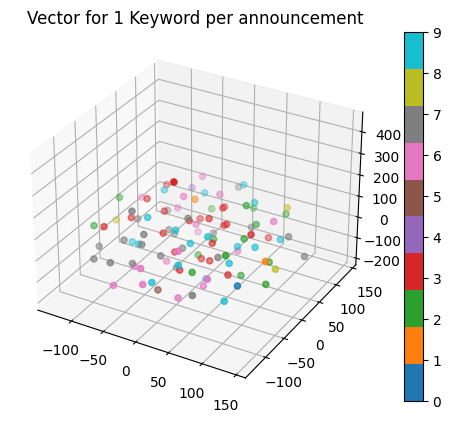

In [33]:
# t-SNE를 사용하여 벡터 차원 축소 및 시각화
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 학습된 단어 벡터 가져오기
word_vectors = model.wv.vectors

# t-SNE를 사용하여 벡터 차원을 3으로 축소
tsne = TSNE(n_components=3)
vectors_3d = tsne.fit_transform(word_vectors)

from mpl_toolkits.mplot3d import Axes3D

# 군집화 결과를 가져와서 각 데이터 포인트에 대한 색상 지정
cluster_labels = kmeans.labels_

# 컬러맵 선택
cmap = 'tab10'  # 예시로 'tab10' 컬러맵을 사용합니다

# 3차원 벡터 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2], c=cluster_labels, cmap=cmap)
ax.set_title("Vector for 1 Keyword per announcement")

# 컬러바 추가
cbar = plt.colorbar(scatter)

# 그래프를 화면에 표시
plt.show()

Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from current font.
Glyph 54785 (\N{HANGUL SYLLABLE HYEOG}) missing from current font.
Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
Glyph 51652 (\N{HA

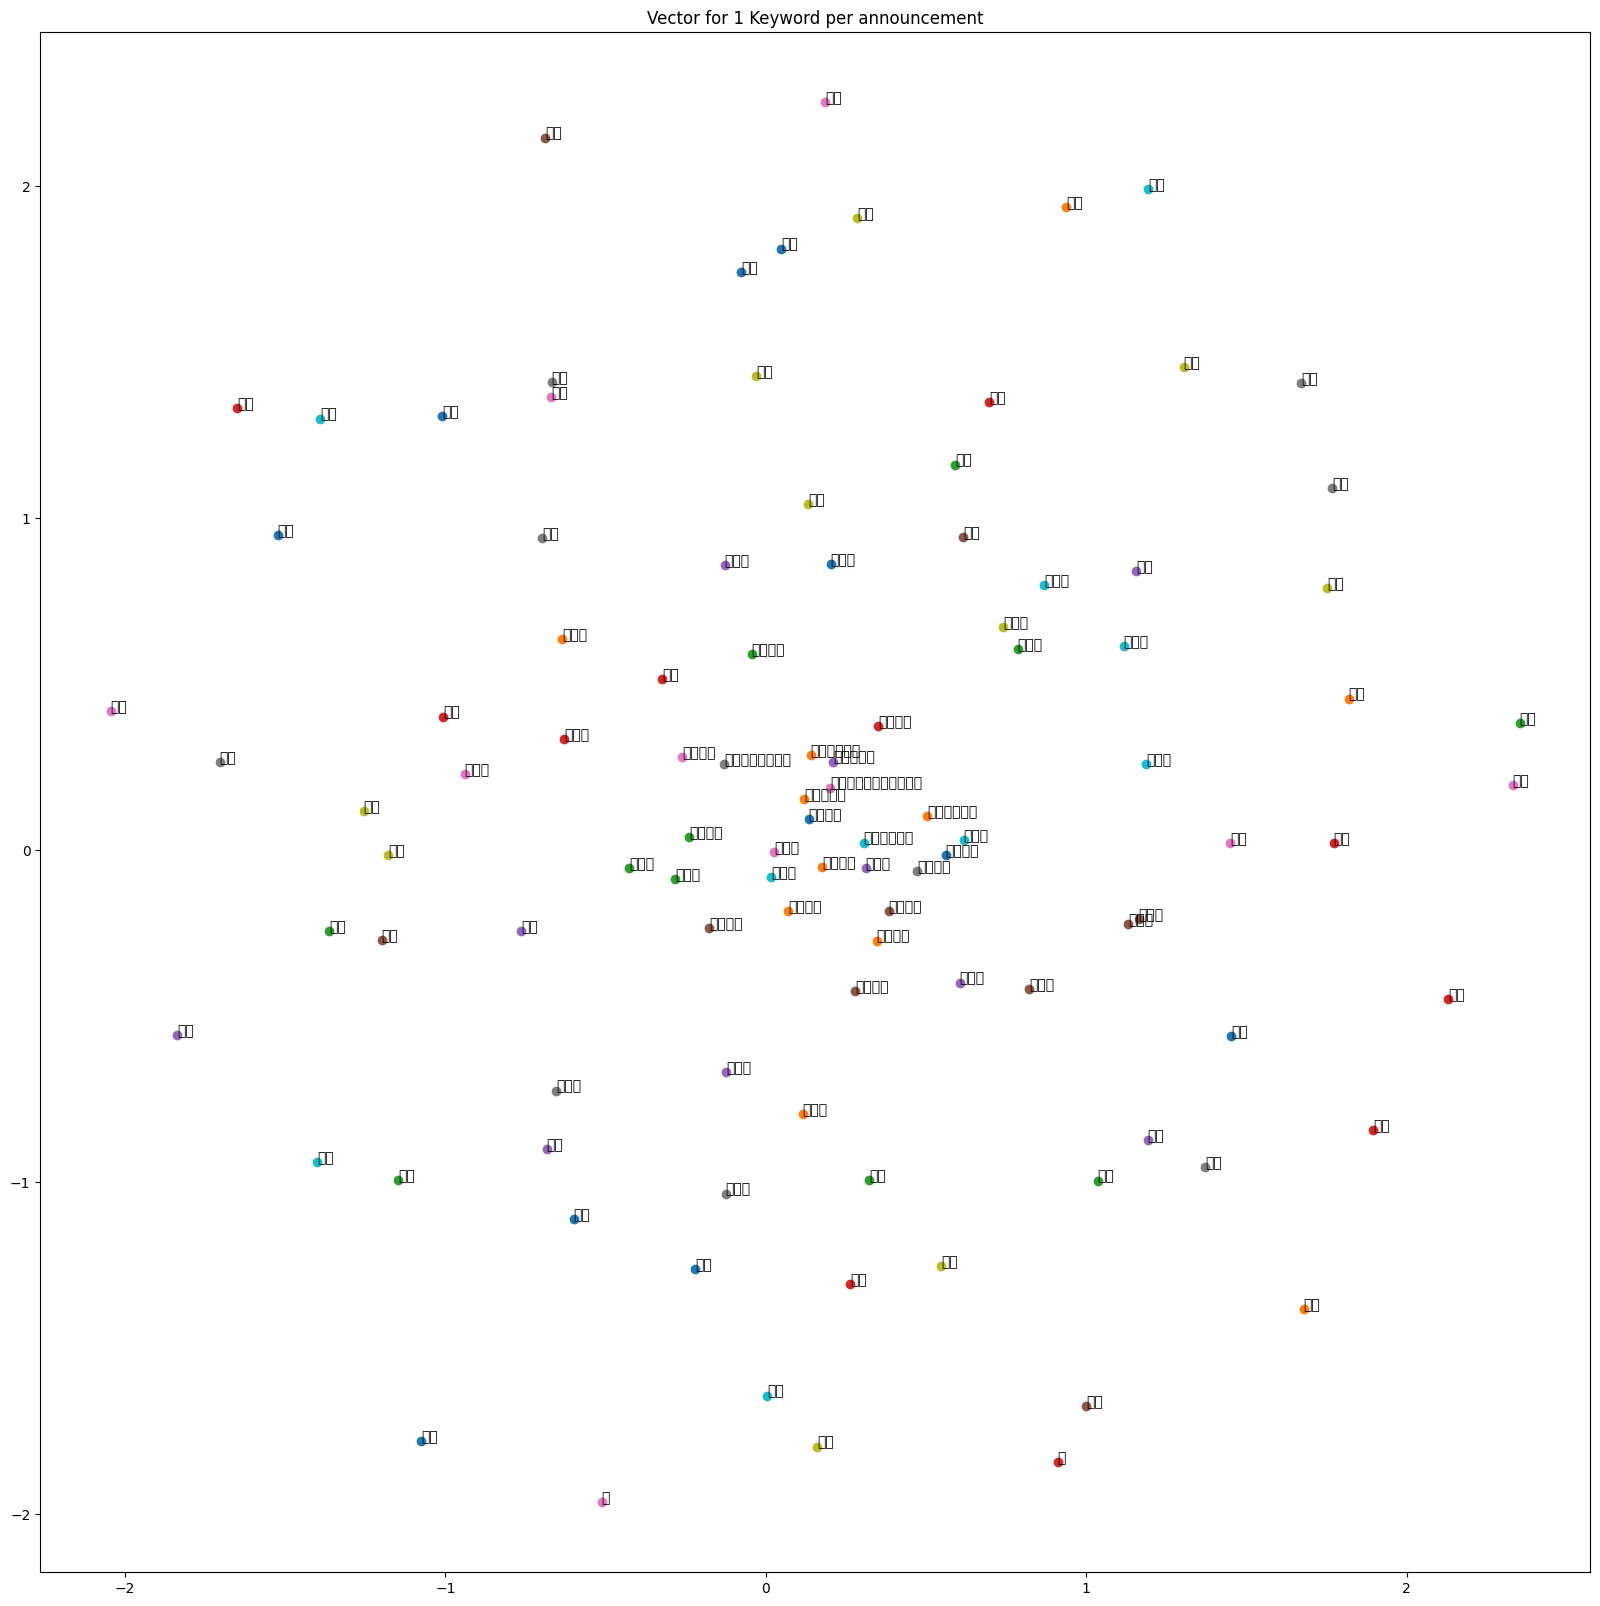

In [34]:
##2차원 그래프 시각화
from sklearn.manifold import TSNE

# t-SNE를 사용하여 벡터 차원을 2로 축소
tsne = TSNE(n_components=2)
word_vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(20, 20))
plt.title("Vector for 1 Keyword per announcement")  # 제목 추가

for i, label in enumerate(cluster_labels):
    x, y = word_vectors_2d[i]
    plt.scatter(x, y)
    plt.annotate(word_labels[i], (x, y))

# 이미지 파일로 저장
plt.savefig('cluster_result.png', dpi=300, format='png')
plt.show()
